<h1>SM-NUMBA-SINTEL-convolved
</h1><br>


In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd "./gdrive/My Drive/python_projects/FYP/"

/content/gdrive/My Drive/python_projects/FYP


In [0]:
# built in modules and libraries

import numpy as np
import importlib as imp
import cv2
import os
import matplotlib.pyplot as plt
import gc
import math
import time
import glob

# Custom libraries/classes

from components.classes.NumbaSimpleMatcher import Wrapper as m
from components.classes.SimpleProgressBar import SimpleProgressBar
from components.classes.CSVExperimentLogger2 import CSVExperimentLogger2 as l
from components.classes.Metrix import Metrix as me
from components.classes.SintelReader import SintelReader

# Custom libraries/utils

from components.utils import plot_utils as plu
from components.utils import utils as u

##Configuring and testing data generator

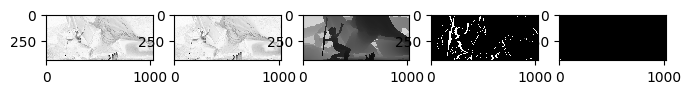

File ./optimization/final//numba_sm/sm_vgg16_convolutions_eval_gc.csv already exists, header has not been written.


In [0]:
## log file ditectory

ROOT_DATA_SRC = "./optimization/final/"
LOG_DIRECTORY = ROOT_DATA_SRC+"/numba_sm/"
CSV_FILE_NAME =  "sm_vgg16_convolutions_eval_gc.csv"
CSV_FILE_PATH = os.path.join(LOG_DIRECTORY, CSV_FILE_NAME)

## input directory and test reader

path = "./datasets/sintel/training"
reader = SintelReader(rootPath=path)
#reader.print_available_scenes()
reader.set_selected_scene('cave_4')
loaded_imgs = reader.get_selected_scene_next_files()
SintelReader.plot_images_to_compare(loaded_imgs)

## specifying log file parameters


log = l(file_path = CSV_FILE_PATH)


progress_bar = SimpleProgressBar.get_instance()

imp.reload(u)

spec_dict = dict({})



spec_dict["is_parallel"] = "True"

spec_dict["img_name"] = "sintel_sm_Resnet50-convolved"

spec_dict["alg_type"] =  "sm_numba_Resnet50_line_by_line"
spec_dict["is_img_preprocessed"] = "yes"
spec_dict["convolution_filters_pretag"] = "VGG16_"

## This has to be updated iteratively

spec_dict["convolution_filters"] = spec_dict["convolution_filters_pretag"]+"" 
spec_dict["filter_strategy"] = "-"
spec_dict["matching_mode"] = non_occ =  "occlusions_added_to_the_groundtruth"
spec_dict["matrix_init_mode"] = 2


In [0]:
##Matcher visual and metrical testing
"""
m_score, gap_score, egap_score = 60, -20, -1
matcher = m(m_score, gap_score, egap_score)
    
matcher.set_images(loaded_imgs[1], loaded_imgs[0])  
matcher.configure_instance()      
x,raw_disp_map = matcher.run_pipeline()

SintelReader.plot_images_to_compare([raw_disp_map, loaded_imgs[2], loaded_imgs[3], loaded_imgs[4]])

disp_modified = SintelReader.add_masks_to_raw_disparity(loaded_imgs[2],loaded_imgs[3], loaded_imgs[4])
ABS_ERR = me.avgerr(raw_disp_map, disp_modified)
mse = me.mse(raw_disp_map, disp_modified)
euclid = me.eucledian_distance(raw_disp_map, disp_modified)

print([ABS_ERR, mse, euclid])"""

'\nm_score, gap_score, egap_score = 60, -20, -1\nmatcher = m(m_score, gap_score, egap_score)\n    \nmatcher.set_images(loaded_imgs[1], loaded_imgs[0])  \nmatcher.configure_instance()      \nx,raw_disp_map = matcher.run_pipeline()\n\nSintelReader.plot_images_to_compare([raw_disp_map, loaded_imgs[2], loaded_imgs[3], loaded_imgs[4]])\n\ndisp_modified = SintelReader.add_masks_to_raw_disparity(loaded_imgs[2],loaded_imgs[3], loaded_imgs[4])\nABS_ERR = me.avgerr(raw_disp_map, disp_modified)\nmse = me.mse(raw_disp_map, disp_modified)\neuclid = me.eucledian_distance(raw_disp_map, disp_modified)\n\nprint([ABS_ERR, mse, euclid])'

In [0]:
# !pip install tensorflow-gpu==2.1

In [0]:
path = "./datasets/sintel/training"
reader = SintelReader(rootPath=path)
reader.print_available_scenes()


width = 1024
height = 120
img_dim = [height, width, 3]


import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
try:
    tf.config.set_logical_device_configuration(
        physical_devices[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=5000),
          tf.config.LogicalDeviceConfiguration(memory_limit=5000)])

    logical_devices = tf.config.list_logical_devices('GPU')
    assert len(logical_devices) == len(physical_devices) + 1

    tf.config.set_logical_device_configuration(
        physical_devices[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=5000),
          tf.config.LogicalDeviceConfiguration(memory_limit=5000)])
except:
    # Invalid device or cannot modify logical devices once initialized.
    pass

from components.utils import tf_utils as tfu

model = tfu.get_vgg16_first_layer_model(img_dim)
model.summary()
model.get_config()


shaman_2, cave_4, shaman_3, sleeping_1, market_2, alley_1, sleeping_2, alley_2, ambush_2, ambush_4, ambush_5, ambush_6, ambush_7, bamboo_1, temple_2, bamboo_2, bandage_1, bandage_2, cave_2, market_5, temple_3, market_6, mountain_1, 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 120, 1024, 3)]    0         
_________________________________________________________________
block1_conv1 (Conv2D)        multiple                  1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


{'input_layers': [['input_4', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 120, 1024, 3),
    'dtype': 'float32',
    'name': 'input_4',
    'ragged': False,
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_4'},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 64,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3, 3),
    'name': 'block1_conv1',
    'padding': 'same',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True},
   'inbound_nodes': [[['input_4', 0, 0, {}]]],
   'name': 'block1_conv1'}],
 'name': 'model_1',
 'ou

In [0]:
reader.convolve_slices_and_save(model,  slice_height = height, slice_width = width, output_directory="./optimization/pickled_slice_predictions/vgg16/")


Writing file ./optimization/pickled_slice_predictions/vgg16/shaman_2_im-0-lr_w-1024_h-120_sr-0
Writing file ./optimization/pickled_slice_predictions/vgg16/cave_4_im-0-lr_w-1024_h-120_sr-0
Writing file ./optimization/pickled_slice_predictions/vgg16/shaman_3_im-0-lr_w-1024_h-120_sr-0
Writing file ./optimization/pickled_slice_predictions/vgg16/sleeping_1_im-0-lr_w-1024_h-120_sr-0
Writing file ./optimization/pickled_slice_predictions/vgg16/market_2_im-0-lr_w-1024_h-120_sr-0
Writing file ./optimization/pickled_slice_predictions/vgg16/alley_1_im-0-lr_w-1024_h-120_sr-0
Writing file ./optimization/pickled_slice_predictions/vgg16/sleeping_2_im-0-lr_w-1024_h-120_sr-0
Writing file ./optimization/pickled_slice_predictions/vgg16/alley_2_im-0-lr_w-1024_h-120_sr-0
Writing file ./optimization/pickled_slice_predictions/vgg16/ambush_2_im-0-lr_w-1024_h-120_sr-0
Writing file ./optimization/pickled_slice_predictions/vgg16/ambush_4_im-0-lr_w-1024_h-120_sr-0
Writing file ./optimization/pickled_slice_predicti

['./optimization/pickled_slice_predictions/vgg16/alley_1_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/alley_2_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/ambush_2_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/ambush_4_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/ambush_5_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/ambush_6_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/ambush_7_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/bamboo_1_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/bamboo_2_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/bandage_1_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/bandage_2_im-0-lr_w-1024_h-120_sr-0', './optimization/pickled_slice_predictions/vgg16/cave_2_im-0-lr_w

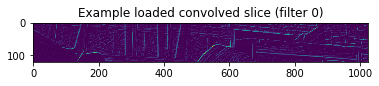

In [0]:
# listing convolved image paths

width = 1024
height = 120
img_dim = [height, width, 3]
#Testing loading convolved and pickled image

pickleees_paths = SintelReader.list_pickled_convolved("./optimization/pickled_slice_predictions/vgg16", width, height)

pickleees_paths = sorted(pickleees_paths)

#print(pickleees_paths)
one_pickle = SintelReader.load_pickled_convolved(pickleees_paths[0])
selected_filter_index = 0

print("Found images: {0}".format(len(pickleees_paths)))
print("Each image's shape: {0}".format(one_pickle.shape))

fig = plt.figure()
ax = fig.gca()

ax.set_title("Example loaded convolved slice (filter {0})".format(selected_filter_index))
plt.imshow(one_pickle[0, :, :, selected_filter_index])


##Initialising loop parameters

In [0]:
## Loading gt and disparity for each slice. 

SCENES = reader.get_available_scenes()
SCENES = sorted(SCENES)

print(SCENES)

ORIGINAL_IMG_DIM = loaded_imgs[0].shape
STARTING_ROW_FOR_SLICES = 0
ROW_HEIGHT_PER_SLICE = 120
NUMBER_OF_COLUMNS = int(ORIGINAL_IMG_DIM[1])

SLICE_DIM = [ROW_HEIGHT_PER_SLICE, NUMBER_OF_COLUMNS]


main_temp = []

for i in range(len(SCENES)):
    
  reader.set_selected_scene(SCENES[i])

  temp = reader.get_selected_scene_next_sliced(SLICE_DIM, starting_row = 0)
  temp = np.array(temp)
  main_temp.append(temp)   

main_temp = np.array(main_temp)
print(main_temp.shape)
stacked_imgs = main_temp[:, 2:]
print(stacked_imgs.shape)


['alley_1', 'alley_2', 'ambush_2', 'ambush_4', 'ambush_5', 'ambush_6', 'ambush_7', 'bamboo_1', 'bamboo_2', 'bandage_1', 'bandage_2', 'cave_2', 'cave_4', 'market_2', 'market_5', 'market_6', 'mountain_1', 'shaman_2', 'shaman_3', 'sleeping_1', 'sleeping_2', 'temple_2', 'temple_3']
(23, 5, 120, 1024)
(23, 3, 120, 1024)


In [0]:
import pandas as pd
#todo select the appropriate file
temp_path = "./optimization/final/numba_legacy/legacy_mixed_lines.csv"
results_data_frame = pd.read_csv(temp_path)
results_data_frame.columns = [str.strip(col) for col in results_data_frame.columns]

results_data_frame.describe()


,match,gap,egap,matrix_init_mode,runtime,euclid_distance,mse,ABS_ERR
count,1760.000000,1760.000000,1760.000000,1760.0,1760.000000,1760.000000,1760.000000,1760.000000
mean,75.000000,-45.000000,-40.000000,2.0,20.167556,40351.744597,13859.730032,94.086499
std,46.110824,28.730977,31.631764,0.0,0.244460,1964.868976,1411.572178,5.112703
min,0.000000,-90.000000,-90.000000,2.0,19.054626,37361.034515,11853.319463,85.450280
25%,37.500000,-70.000000,-70.000000,2.0,20.104191,39448.640176,13214.972928,92.250425
50%,75.000000,-45.000000,-40.000000,2.0,20.180402,40127.836761,13673.940931,93.515065
75%,112.500000,-20.000000,-10.000000,2.0,20.239465,40646.372078,14029.615869,94.600760
max,150.000000,0.000000,10.000000,2.0,22.554628,50147.851499,21355.358441,115.212458


In [0]:
top5_config = []

selected_metric = "ABS_ERR"
res = results_data_frame.sort_values(by=selected_metric).head(3)
res = res[["match", "gap", "egap", selected_metric]].values
top5_config.append(res)

selected_metric = "mse"
res = results_data_frame.sort_values(by=selected_metric).head(3)
res = res[["match", "gap", "egap", selected_metric]].values
top5_config.append(res)

selected_metric = "euclid_distance"
res = results_data_frame.sort_values(by=selected_metric).head(3)
res = res[["match", "gap", "egap", selected_metric]].values
top5_config.append(res)
top5_config.append([60, -20, -1, 0])
stacked_best_params = np.vstack(top5_config)
print(stacked_best_params.shape[0])
print("Please enter the estimated runtime per images in seconds below:")
runtime_multiplyer = input()

10
Please enter the estimated runtime per images in seconds below:
10


In [0]:
number_of_iterations = 10

number_of_iterations =number_of_iterations  * stacked_imgs.shape[0]*64
est_runtime = int(number_of_iterations) * float(runtime_multiplyer)

print("The number of iterations based on the params: {0}".format(round(number_of_iterations)))
print("The amount of time (s) needed to perform the parameter search: {0}".format(est_runtime))
print("The amount of time (h) needed to perform the parameter search: {0}".format(est_runtime/3600))

The number of iterations based on the params: 14720
The amount of time (s) needed to perform the parameter search: 147200.0
The amount of time (h) needed to perform the parameter search: 40.888888888888886


In [ ]:
def best_params_loop(spec_dict, filter):
    cv_index = 0
            match = spec_dict["match"] = best_params[0]
            gap = spec_dict["gap"] = best_params[1]
            egap = spec_dict["egap"] = best_params[2]

            matcher = m(match, gap, egap)

            matcher.set_images(rightee, leftee)
            matcher.configure_instance()   
            tic=time.time()

            x,raw_disp_map = matcher.run_pipeline()

            toc = time.time()
            spec_dict["runtime"] = toc-tic
            spec_dict["filter_strategy"] = "VGG16_one_by_one"
            spec_dict["mse"] = me.mse(raw_disp_map, gt)
            spec_dict["euclid_distance"] =me.eucledian_distance(raw_disp_map, gt)
            spec_dict["ABS_ERR"] = me.avgerr(raw_disp_map, gt, print=False)

            progress_bar.progress_bar(progress_counter, number_of_iterations, header= "Parameter search progress: ", progress_bar_steps=100)
            progress_counter+=1
            log.append_new_sm_results(spec_dict)
            cv_index+=1;
    

##Running the optimisation

In [0]:
progress_counter = 1
start_time = time.time()

spec_dict["matrix_init_mode"] = 2


# 23 pickled paths

for i, convolved_img_pair_path in enumerate(pickleees_paths):
    
    ## Each picklee's shape: (2, 120, 1024, 64)
    spec_dict["img_name"] = convolved_img_pair_path
    
    one_picklee = SintelReader.load_pickled_convolved(convolved_img_pair_path)
    

    #gt is the same for each loaded picklee
    #gt shape: (23, 3, 120, 1024)
    
    gt = reader.add_masks_to_raw_disparity(stacked_imgs[i, 0], stacked_imgs[i, 1], stacked_imgs[i, 2])
    
    for filter_index in range(64):
        
        spec_dict["convolution_filters"] = spec_dict["convolution_filters_pretag"]+str(filter_index)

        leftee = one_picklee[0, :, :, filter_index]
        rightee = one_picklee[1, :, :, filter_index]
        
        # it is supposed to be 16 parameters
        for best_params in stacked_best_params:
            cv_index = 0
            match = spec_dict["match"] = best_params[0]
            gap = spec_dict["gap"] = best_params[1]
            egap = spec_dict["egap"] = best_params[2]

            matcher = m(match, gap, egap)

            matcher.set_images(rightee, leftee)
            matcher.configure_instance()   
            tic=time.time()

            x,raw_disp_map = matcher.run_pipeline()

            toc = time.time()
            spec_dict["runtime"] = toc-tic
            spec_dict["filter_strategy"] = "VGG16_one_by_one"
            spec_dict["mse"] = me.mse(raw_disp_map, gt)
            spec_dict["euclid_distance"] =me.eucledian_distance(raw_disp_map, gt)
            spec_dict["ABS_ERR"] = me.avgerr(raw_disp_map, gt, print=False)

            progress_bar.progress_bar(progress_counter, number_of_iterations, header= "Parameter search progress: ", progress_bar_steps=100)
            progress_counter+=1
            log.append_new_sm_results(spec_dict)
            cv_index+=1;

end_time = time.time()

Parameter search progress:  [>>>>>>>>>>>-----------------------------------------------------------------------------------------] 11.30 % completed: 1664 / 14720 steps

In [0]:
print("The optimisation process taken {0} seconds or {1} hours".format((end_time-start_time), (end_time-start_time)/3600))